In [1]:
import pandas as pd 
import numpy as np

In [2]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df1.columns = ['id','tittle','cast','crew']

In [8]:
df2=df2.merge(df1,on='id')

In [9]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [11]:
df2.vote_count.mean(),df2.vote_count.max(),df2.vote_count.min()

(690.2179887570269, 13752, 0)

In [12]:
df2['Weghted Rating']=df2.vote_count*df2.vote_average/(df2.vote_count+1000)+1000*df2.vote_average.mean()/(df2.vote_count+1000)

In [15]:
movies_on_rating=df2.copy().loc[df2['vote_count'] >= 1000]

In [16]:
movies_on_rating=movies_on_rating.sort_values(by='Weghted Rating',ascending=False)

In [19]:
movies_on_rating[['title', 'vote_count', 'vote_average', 'Weghted Rating']].head(10)

,title,vote_count,vote_average,Weghted Rating
1881,The Shawshank Redemption,8205,8.5,8.238422
662,Fight Club,9413,8.3,8.087974
3232,Pulp Fiction,8428,8.3,8.065822
3337,The Godfather,5893,8.4,8.065192
65,The Dark Knight,12002,8.2,8.037884
96,Inception,13752,8.1,7.963894
809,Forrest Gump,7927,8.2,7.963882
95,Interstellar,10867,8.1,7.930806
1990,The Empire Strikes Back,5879,8.2,7.893585
1818,Schindler's List,4329,8.3,7.885696


In [23]:
sorted_movies_by_popu=movies_on_rating.sort_values(by='popularity',ascending=False)[['title', 'vote_count', 'vote_average', 'Weghted Rating']].head(10)

In [25]:
sorted_movies_by_popu

,title,vote_count,vote_average,Weghted Rating
546,Minions,4571,6.4,6.344744
95,Interstellar,10867,8.1,7.930806
788,Deadpool,10995,7.4,7.290969
94,Guardians of the Galaxy,9742,7.9,7.731705
127,Mad Max: Fury Road,9427,7.2,7.093754
28,Jurassic World,8662,6.5,6.457790
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,7.323691
82,Dawn of the Planet of the Apes,4410,7.3,7.076742
200,The Hunger Games: Mockingjay - Part 1,5584,6.6,6.522869
88,Big Hero 6,6135,7.8,7.560641


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

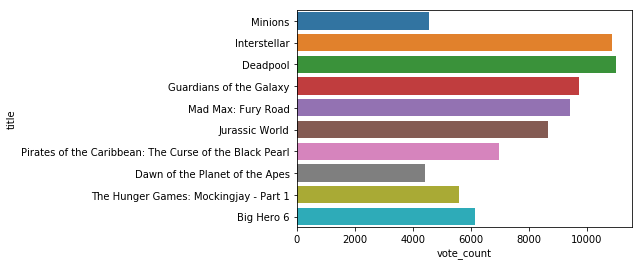

In [28]:
sns.barplot('vote_count','title',data=sorted_movies_by_popu)

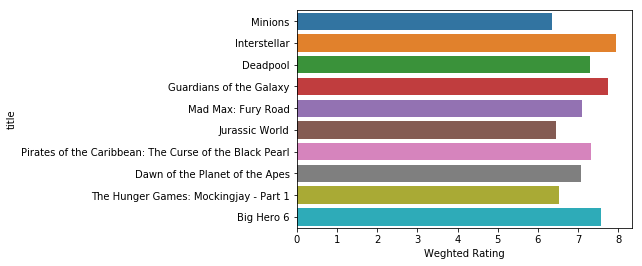

In [27]:
sns.barplot('Weghted Rating','title',data=sorted_movies_by_popu)

In [34]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer(stop_words='english')

In [39]:
df2.overview=df2.overview.fillna('')

In [40]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])

In [43]:
tfidf_matrix.shape

(4803, 20978)

In [44]:
from sklearn.metrics.pairwise import linear_kernel

In [45]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [58]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [53]:
#DF=pd.DataFrame(tfidf_matrix.toarray())

In [59]:
cosine_sim=pd.DataFrame(cosine_sim)

In [293]:
cosine_sim.shape

(4803, 4803)

In [71]:
df2.title.tail(10)

4793                  On The Downlow
4794    Sanctuary: Quite a Conundrum
4795                            Bang
4796                          Primer
4797                          Cavite
4798                     El Mariachi
4799                       Newlyweds
4800       Signed, Sealed, Delivered
4801                Shanghai Calling
4802               My Date with Drew
Name: title, dtype: object

In [310]:
FinalDf=pd.concat([df2['title'],cosine_sim],axis=1)

In [311]:
FinalDf.shape

(4803, 4804)

In [312]:
FinalDf.head()

,title,0,1,2,3,4,5,6,7,8,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,Avatar,1.000000,0.000000,0.0,0.024995,0.000000,0.030353,0.000000,0.037581,0.000000,...,0.000000,0.0,0.029175,0.042176,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,Pirates of the Caribbean: At World's End,0.000000,1.000000,0.0,0.000000,0.033369,0.000000,0.000000,0.022676,0.000000,...,0.000000,0.0,0.006895,0.000000,0.000000,0.0,0.0,0.021605,0.000000,0.000000
2,Spectre,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.030949,0.024830,...,0.027695,0.0,0.000000,0.000000,0.017768,0.0,0.0,0.014882,0.000000,0.000000
3,The Dark Knight Rises,0.024995,0.000000,0.0,1.000000,0.010433,0.005145,0.012601,0.026954,0.020652,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.033864,0.042752,0.022692
4,John Carter,0.000000,0.033369,0.0,0.010433,1.000000,0.000000,0.009339,0.037407,0.000000,...,0.012730,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.006126,0.000000,0.000000


In [313]:
FinalDf.set_index('title', inplace=True)

In [314]:
FinalDf.shape

(4803, 4803)

In [315]:
FinalDf.columns=FinalDf.index

In [316]:
FinalDf.shape

(4803, 4803)

In [317]:
a=pd.DataFrame(df2[['title','vote_count','Weghted Rating']])

In [318]:
a.set_index('title', inplace=True)
a.shape

(4803, 2)

In [319]:
FinalDf = pd.concat([FinalDf, a], axis=1)

In [321]:
FinalDf.head()

,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew,vote_count,Weghted Rating
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.000000,0.0,0.024995,0.000000,0.030353,0.000000,0.037581,0.000000,0.000000,...,0.029175,0.042176,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11800,7.113451
Pirates of the Caribbean: At World's End,0.000000,1.000000,0.0,0.000000,0.033369,0.000000,0.000000,0.022676,0.000000,0.000000,...,0.006895,0.000000,0.000000,0.0,0.0,0.021605,0.000000,0.000000,4500,6.753122
Spectre,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.030949,0.024830,0.000000,...,0.000000,0.000000,0.017768,0.0,0.0,0.014882,0.000000,0.000000,4466,6.261978
The Dark Knight Rises,0.024995,0.000000,0.0,1.000000,0.010433,0.005145,0.012601,0.026954,0.020652,0.133740,...,0.000000,0.000000,0.000000,0.0,0.0,0.033864,0.042752,0.022692,9106,7.450799
John Carter,0.000000,0.033369,0.0,0.010433,1.000000,0.000000,0.009339,0.037407,0.000000,0.017148,...,0.000000,0.000000,0.000000,0.0,0.0,0.006126,0.000000,0.000000,2124,6.097494


In [320]:
df2.shape,FinalDf.shape

((4803, 24), (4803, 4805))

In [322]:
def recommended_movies(Movie_Name):
    result=pd.DataFrame(FinalDf[(FinalDf['vote_count']>1000) & (FinalDf['Weghted Rating']>7)][Movie_Name].sort_values(ascending=False).index).head(10)
    return (result)

In [323]:
recommended_movies("Avatar")

,title
0,Avatar
1,The Matrix
2,E.T. the Extra-Terrestrial
3,Moon
4,Edge of Tomorrow
5,Iron Man
6,The Thing
7,Pirates of the Caribbean: The Curse of the Bla...
8,The Exorcist
9,Avengers: Age of Ultron
